In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score


In [68]:
# mpg (response) cylinders displacement horsepower weight acceleration model


names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']
data = pd.read_csv('Data/auto-mpg.csv')

data_array = None 

for row in pd.Series.to_numpy(data['Data']):
    new_row = [float(value) for value in row.split()]
    if data_array is None:
        data_array = np.array([new_row])
    else:
        data_array = np.concatenate((data_array, np.array([new_row])), axis=0)


In [69]:
def linear_regression(x, y):
    '''
    Assume datapoints on row
    '''
    if len(x.shape) < 2:
        x = np.array([x]).T
    
    y = np.array([y])
    ones = np.ones((len(x), 1))

    X = np.concatenate((x, ones), axis=1)

    #Find features by (X^T X)^(-1) X^T y
    #Returns a 2x1 matrix (slope and intercept)
    theta = (np.linalg.inv(X.T@X)@X.T)@y.T
    slope = theta[:-1]
    intercept = theta[-1]
    return slope, intercept

data_array = (data_array - np.min(data_array, axis=0, keepdims=True))/(np.max(data_array, axis=0, keepdims=True) - np.min(data_array, axis=0, keepdims=True))
print(data_array.shape)
y = data_array[:,0]
X = data_array[:,1:]
slope, intercept = linear_regression(X, y)

print(r2_score(y, X@slope + intercept))

(392, 7)
0.8092552890383932


In [70]:
#3b
for name, value in zip(names, slope.flatten()):
    print(f'{name}: {np.round(value, decimals=2)}')

cylinders: -0.04
displacement: 0.08
horsepower: -0.0
weight: -0.64
acceleration: 0.04
model: 0.24


In [71]:
#3d



X_tmp = np.delete(X, [0], axis=1)
print(X_tmp.shape)

slope, intercept = linear_regression(X_tmp, y)

print(r2_score(y, X_tmp@slope + intercept))

(392, 5)
0.8087665240097104


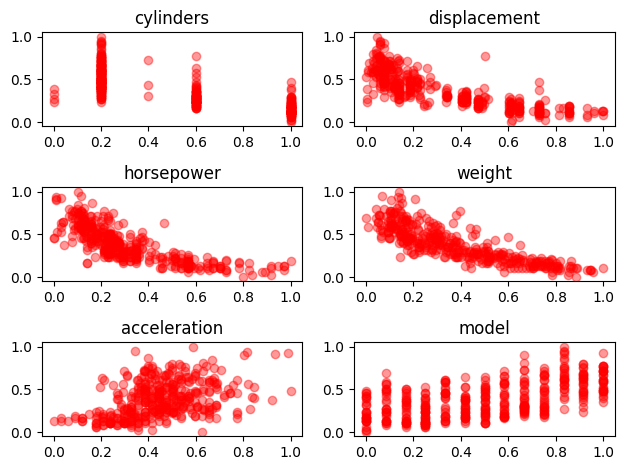

In [72]:
plt.figure()
for i in range(6):
        plt.subplot(3,2,i+1)
        plt.scatter(X[:,i], y, alpha=0.4, c='r')
        plt.title(names[i])
plt.tight_layout()
plt.show()